<a href="https://colab.research.google.com/github/CeciMiranda/AnaliseEstatistica-FilmesDeTerror/blob/main/An%C3%A1lise_Estat%C3%ADstica_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import ttest_ind
from google.colab import files
uploaded = files.upload()

Saving Horror Movies IMDb.csv to Horror Movies IMDb (1).csv


In [ ]:
#Lendo os dados do csv e removendo as linhas com valores vazios
x = pd.read_csv('Horror Movies IMDb.csv', encoding='latin-1', delimiter=';')
x.dropna(inplace=True)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 834
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie Title  637 non-null    object
 1   Movie Year   637 non-null    int64 
 2   Runtime      637 non-null    int64 
 3   Genre        637 non-null    object
 4   Rating       637 non-null    int64 
 5   Director     637 non-null    object
 6   Votes        637 non-null    object
 7   Gross        637 non-null    object
dtypes: int64(3), object(5)
memory usage: 44.8+ KB


In [ ]:
x.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",85,Ridley Scott,"9,05,275",$78.90M
1,Psycho,1960,109,"Horror, Mystery, Thriller",85,Alfred Hitchcock,"6,89,068",$32.00M
2,The Shining,1980,146,"Drama, Horror",84,Stanley Kubrick,"10,51,582",$44.02M
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",82,John Carpenter,"4,39,793",$13.78M
5,The Exorcist,1973,122,Horror,81,William Friedkin,"4,22,330",$232.91M


In [ ]:
x.describe()

,Movie Year,Runtime,Rating
count,637.000000,637.000000,637.000000
mean,2003.361068,100.835165,57.032967
std,13.985783,13.869659,17.531387
min,1932.000000,64.000000,3.000000
25%,1996.000000,91.000000,54.000000
50%,2007.000000,98.000000,62.000000
75%,2014.000000,108.000000,67.000000
max,2022.000000,191.000000,85.000000


In [ ]:
#Fundo cinza
sns.set_style('darkgrid')

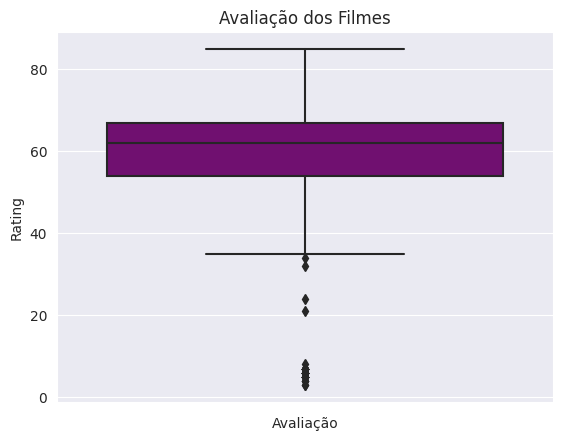

62.0


In [ ]:
###Como está a distribuição das avaliações dos filmes?

sns.boxplot(y=x['Rating'], color='purple')
plt.xlabel('Avaliação')
plt.title('Avaliação dos Filmes')
plt.show()

print(x['Rating'].median())

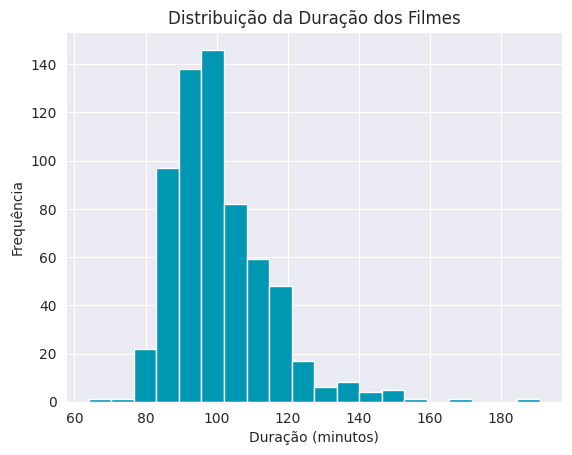

In [ ]:
##Quanto tempo tempo a maioria dos filmes costuma durar?

plt.hist(x['Runtime'], bins=20, color='#0097B2')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.title('Distribuição da Duração dos Filmes')
plt.show()

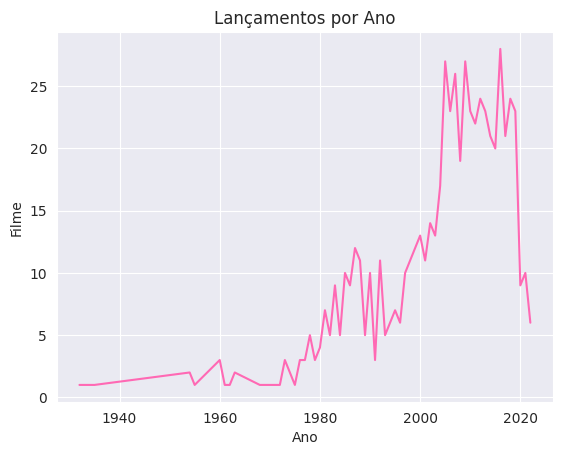

In [ ]:
#Como o número de filmes de terror lançados tem variado ao longo dos anos?

#Agrupamento e contagem de filmes por ano de lançamento
filmesPorAno = x.groupby('Movie Year', as_index = False)['Movie Title'].count()

sns.lineplot(x ='Movie Year', y='Movie Title', data = filmesPorAno, color="hotpink")
plt.ylabel('Filme')
plt.xlabel('Ano')
plt.title('Lançamentos por Ano')
plt.show()

In [ ]:
def converterMilhao(num):
    if isinstance(num, str):
        num = num.replace('$', '').replace('M', '')
        return float(num) * 1e6
    else:
        return


x['NewGross'] = x['Gross'].apply(converterMilhao)

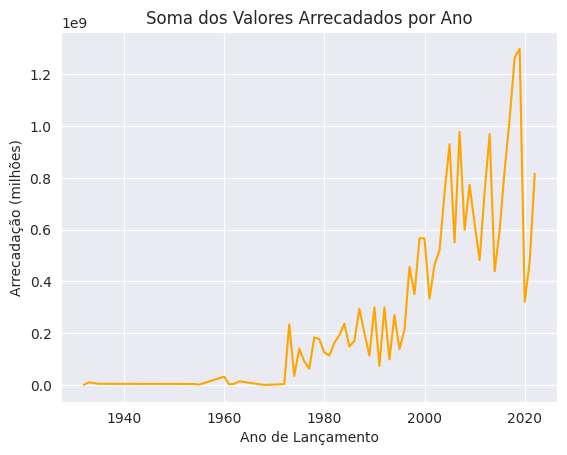

In [ ]:
##Como a arrecadação de filmes tem variado ao longo dos anos?

#soma e agrupa os valores arrecadados em cada ano
valAno = x.groupby('Movie Year')['NewGross'].sum()

valAno.plot(kind='line', color="orange")
plt.xlabel('Ano de Lançamento')
plt.ylabel('Arrecadação (milhões)')
plt.title('Soma dos Valores Arrecadados por Ano')
plt.show()

In [ ]:
#criação de uma coluna com as décadas de cada filme
x['Decade'] = x['Movie Year'].apply(lambda x: (x // 10) * 10)

#criação da coluna subgênero
subgeneros = x[['Decade', 'Genre', 'Rating', 'Votes', 'Gross', 'Runtime']].copy()
subgeneros['subgeneros'] = subgeneros['Genre'].apply(lambda x: x.split(', ')) #separa os generos por virgula
subgeneros = subgeneros.explode('subgeneros') #explode transforma uma unica linha em varias linhas

x.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,NewGross,Decade
0,Alien,1979,117,"Horror, Sci-Fi",85,Ridley Scott,"9,05,275",$78.90M,78900000.0,1970
1,Psycho,1960,109,"Horror, Mystery, Thriller",85,Alfred Hitchcock,"6,89,068",$32.00M,32000000.0,1960
2,The Shining,1980,146,"Drama, Horror",84,Stanley Kubrick,"10,51,582",$44.02M,44020000.0,1980
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",82,John Carpenter,"4,39,793",$13.78M,13780000.0,1980
5,The Exorcist,1973,122,Horror,81,William Friedkin,"4,22,330",$232.91M,232910000.0,1970


In [ ]:
## Como os subgêneros de terror tem variado ao longo das décadas?

#Contagem dos subgêneros por década
contaSubgDecada = subgeneros.groupby(['Decade', 'subgeneros']).size().reset_index(name='Count')

# Plotar gráfico de linha
fig = px.line(contaSubgDecada, x='Decade', y='Count', color='subgeneros', title="Tendência dos Subgêneros de Terror por Década")
fig.show()

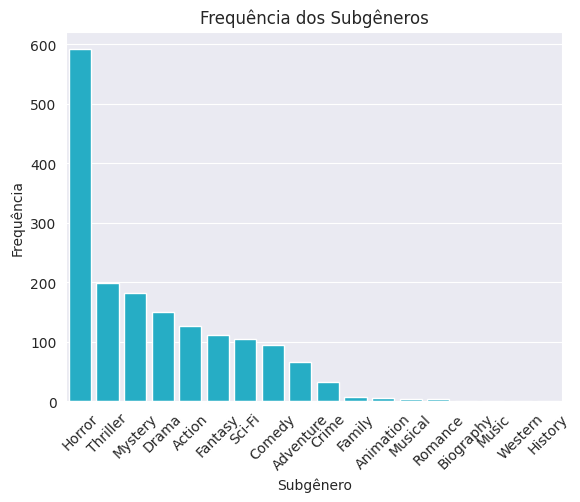

In [ ]:
## Qual a frequencia dos subgêneros?

contaSubg = subgeneros['subgeneros'].value_counts()
sns.barplot(x=contaSubg.index, y=contaSubg, color="#0CC0DF")
plt.title('Frequência dos Subgêneros')
plt.xlabel('Subgênero')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

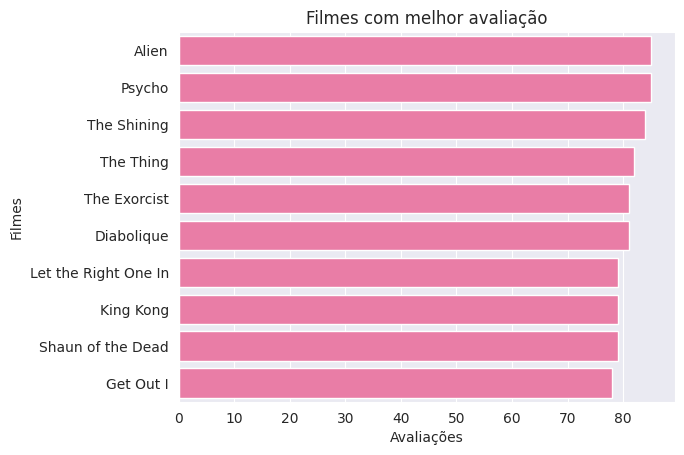

In [ ]:
##Quais são os filmes mais bem avaliados?

##Seleciona os 10 filmes com melhor avaliação
top10Rating = x.sort_values('Rating', ascending=False)[:10]

sns.barplot(x = 'Rating', y = 'Movie Title', data = top10Rating, color="#FB6BA2")
plt.ylabel('Filmes')
plt.xlabel('Avaliações')
plt.title('Filmes com melhor avaliação')

plt.show()

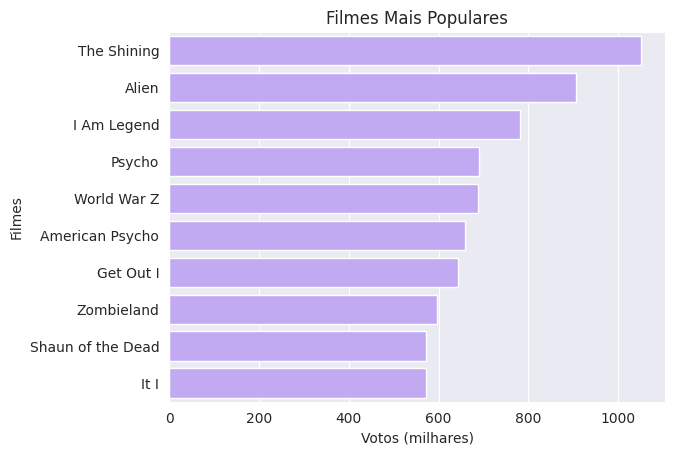

In [ ]:
##Quais são os filmes mais populares?

def formatarMilhar(x, pos):
    return f'{x / 1e3:.0f}'

x['Votes'] = x['Votes'].astype(str).str.replace(',', '').astype(int)
top10Votes = x.sort_values('Votes', ascending=False)[:10]
ax = sns.barplot(x='Votes', y='Movie Title', data=top10Votes, color="#BE9EFF")

ax.xaxis.set_major_formatter(FuncFormatter(formatarMilhar))
#set_major_formatter é um método que define o formatador para os rótulos do eixo x
#FuncFormatter é uma classe que permite definir um formatador personalizado

plt.xlabel('Votos (milhares)')
plt.ylabel('Filmes')
plt.title('Filmes Mais Populares')

plt.show()

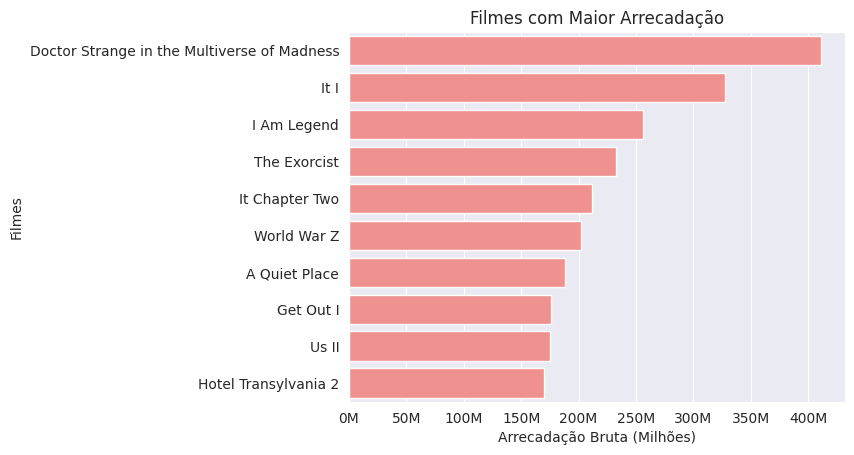

In [ ]:
##Quais são os filmes que mais arrecadaram dinheiro?

def formatarMilhao (x, pos):
    return f'{x / 1e6:.0f}M'

top10Gross = x.sort_values('NewGross', ascending =False)[:10]
ax = sns.barplot(x = 'NewGross', y = 'Movie Title', data = top10Gross, color='#FF827E')
ax.xaxis.set_major_formatter(FuncFormatter(formatarMilhao))
ax.set_xlabel('Arrecadação Bruta (Milhões)')
ax.set_ylabel('Filmes')
ax.set_title('Filmes com Maior Arrecadação');

In [ ]:
fig = px.scatter(x, x='NewGross', y='Rating', color='Decade', hover_name='Movie Title',
                 title='Avaliação vs. Bilheteria Bruta',
                 color_continuous_scale=px.colors.sequential.Magma)


fig.update_xaxes(title_text='Bilheteria Bruta (Milhões)')
fig.update_yaxes(title_text='Avaliações')


fig.show()

In [ ]:
fig = px.scatter(x, x='NewGross', y='Votes', hover_name='Movie Title', color='Decade', title='Popularidade vs. Bilheteria Bruta',
                  color_continuous_scale=px.colors.sequential.Magma)

fig.update_xaxes(title_text='Arrecadação Bruta (Milhões)')
fig.update_yaxes(title_text='Popularidade')

fig.show()

In [ ]:
fig = px.scatter(x, x='Votes', y='Rating', hover_name='Movie Title', color='Decade', title='Avaliação vs. Número de votos',
                 color_continuous_scale=px.colors.sequential.Magma)

fig.update_xaxes(title_text='Número de votos')
fig.update_yaxes(title_text='Avaliações')

fig.show()

In [ ]:
## Os filmes até os anos 80 tem avaliação melhor que os outros filmes.

#μ1 média de avaliação dos filmes até os anos 80 (avaliacaoAte80)
#μ2 média de avaliação dos filmes após os anos 80 (avaliacaoOutros)

#H0: μ1 <= μ2
#H1: μ1 > μ2

# Divisão dos filmes em duas amostras: antes dos anos 80 e depois dos anos 80 e a avaliação
avaliacaoAte80 = x[x['Decade'] <= 1980]['Rating']
avaliacaoOutros = x[x['Decade'] > 1980]['Rating']

# Realizar o teste t de duas amostras independentes, testa se a média da avaliação dos filmes até os anos 80 é maior.
estatisticaTeste, probabilidade = ttest_ind(avaliacaoAte80, avaliacaoOutros, alternative='greater')

# Nível de significância, uma probabilidade de 5% de estarmos errados e rejeitar a hipotese nula(H0: μ1 = μ2)
nivelSignificancia = 0.05

# Verificação da significância estatística
if probabilidade < nivelSignificancia:
    resultado = "Os filmes até os anos 80 são mais bem avaliados que os outros filmes. Hipótese nula rejeitada."
else:
    resultado = "Não há evidências suficientes para afirmar que os filmes até os anos 80 são mais bem avaliados que os outros filmes. Hipótese nula não rejeitada."

print(resultado)

Os filmes até os anos 80 são mais bem avaliados que os outros filmes. Hipótese nula rejeitada.


In [ ]:
## Filmes até os anos 80 têm um menor número de votos que os filmes atuais.

#μ1 média do número de votos dos filmes até os anos 80 (votosAte80)
#μ2 média do número de votos dos filmes após os anos 80 (votosOutros)

#H0: μ1 >= μ2
#H1: μ1 < μ2

# Divisão dos filmes em antes dos anos 80 e depois dos anos 80 mais e o numero de votos
votosAte80 = x[x['Movie Year'] <= 1980]['Votes']
votosOutros = x[x['Movie Year'] > 1980]['Votes']

## Realizar o teste t de duas amostras independentes, testa se a média do número de votos dos filmes a partir dos anos 80 é menor.
estatisticaTeste, probabilidade = ttest_ind(votosAte80, votosOutros, alternative='less')

# Nível de significância, uma probabilidade de 5% de estarmos errados e rejeitar a hipotese nula (H0: μ1 >= μ2)
nivelSignificancia = 0.05

# Verificar a significância estatística
if probabilidade < nivelSignificancia:
    resultado = "Filmes até os anos 80 têm um menor número de votos que os filmes atuais. Hipótese nula rejeitada."
else:
    resultado = "Não se pode afirmar que filmes até os anos 80 têm um menor número de votos que os filmes atuais. Hipótese nula não rejeitada."

print(resultado)

Não se pode afirmar que filmes até os anos 80 têm um menor número de votos que os filmes atuais. Hipótese nula não rejeitada.


In [ ]:
## Filmes a partir dos anos 80 têm uma bilheteria maior que os filmes antes dos anos 80.

#μ1 média da bilheteria dos filmes a partir dos anos 80 (grossAte80)
#μ2 média da bilheteria dos filmes antes dos anos 80 (grossOutros)

#H0: μ1 <= μ2
#H1: μ1 > μ2

# Divisão dos filmes em antes dos anos 80 e depois dos anos 80 e a bilheteria
grossAte80 = x[x['Movie Year'] >= 1980]['NewGross']
grossOutros = x[x['Movie Year'] < 1980]['NewGross']

# Realizar o teste t de duas amostras independentes, testa se a média da bilheteria dos filmes a partir dos anos 80 é maior.
estatisticaTeste, probabilidade = ttest_ind(grossAte80, grossOutros, alternative='greater')

# Nível de significância, uma probabilidade de 5% de estarmos errados e rejeitar a hipotese nula (H0: μ1 <= μ2)
nivelSignificancia = 0.05

# Verificar a significância estatística
if probabilidade < nivelSignificancia:
    resultado = "Filmes a partir dos anos 80 têm uma bilheteria maior que os filmes antes dos anos 80. Hipótese nula rejeitada."
else:
    resultado = "Não se pode afirmar que os filmes a partir dos anos 80 têm uma bilheteria maior que os filmes antes dos anos 80. Hipótese nula não rejeitada."

print(resultado)

Não se pode afirmar que os filmes a partir dos anos 80 têm uma bilheteria maior que os filmes antes dos anos 80. Hipótese nula não rejeitada.
